In [16]:
import numpy as np
import uproot
import matplotlib.pyplot as plt

In [17]:
myFile = uproot.open('alltestfiles.root')

In [18]:
tree = myFile['TestTree']

In [19]:
eventId = tree.array('eventId')
pfoId = tree.array('pfoId')
driftPos = tree.array('hitDriftPositionsW')
wirePos = tree.array('hitWirePositionsW')
pdg = tree.array('bestMCParticlePdgCode')
isTrack = tree.array('bestMCParticleIsTrack')
completeness = tree.array('completeness')
purity = tree.array('purity')

#Why do we need to close the file?

# Calculate means

In [20]:
drift_pos_av = driftPos.mean()
wire_pos_av = wirePos.mean()

# Calculate gradient

In [23]:
drift_comp = driftPos - drift_pos_av
wire_comp = wirePos - wire_pos_av
drift_comp_sq = drift_comp ** 2
numerator = (drift_comp * wire_comp).sum()
denominator = (drift_comp_sq).sum()
m = numerator / denominator
c = wire_pos_av - m * drift_pos_av

C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


# Line plotting

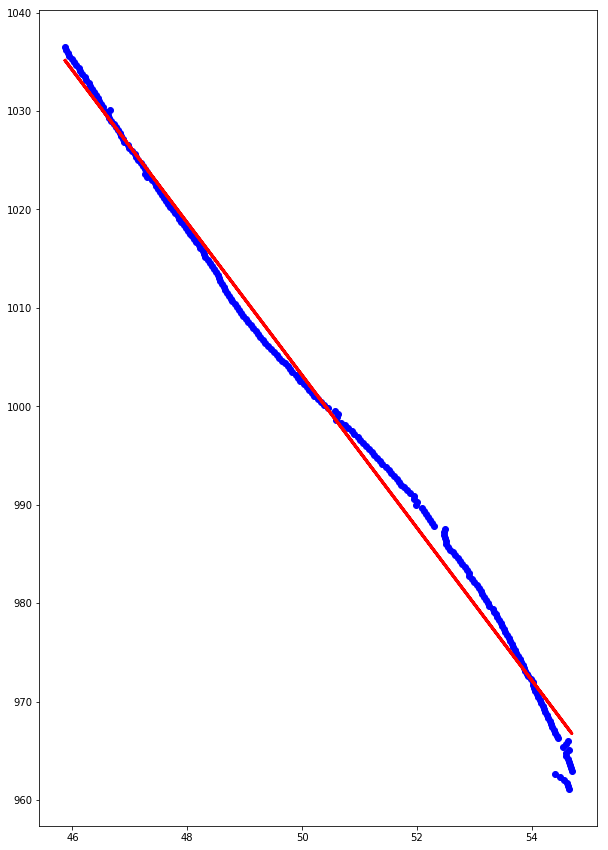

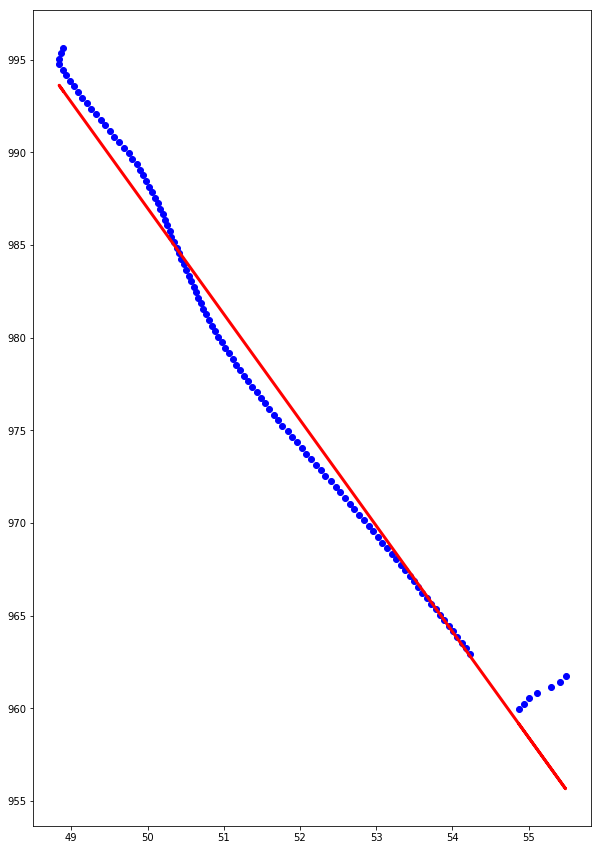

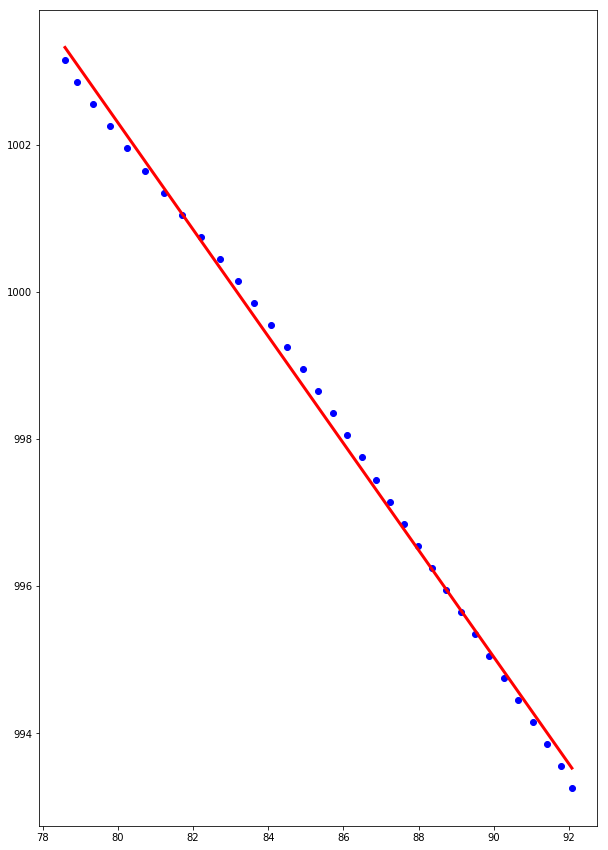

In [24]:
for i in range(len(driftPos[:3])):
    y = m[i]*driftPos[i] + c[i]
    fig = plt.figure(figsize = (10, 15))
    plt.scatter(driftPos[i], wirePos[i], color = 'b')
    plt.plot(driftPos[i], y, color = 'r', linewidth = 3) 

# Calculate Pearson correlation coefficient (r)

In [25]:
num = numerator

denom_x = (drift_comp_sq).sum()
wire_comp_sq = wire_comp ** 2
denom_y = (wire_comp_sq).sum()
denom = np.sqrt(denom_x * denom_y)

r = num / denom
rsq = r ** 2

#print(rsq)

C:\Users\r.xavier\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


# Cuts on purity and completeness

In [26]:
#Python list comprehension: loop over driftPos array,
#for every element i.e. every hit,
#tell me the length and store that in a numpy array idx_len.
select_pfos_len = np.array([ len(x) for x in driftPos])

track_pfos = np.where((completeness > 0.79) & (purity > 0.89) & (select_pfos_len > 0) & (isTrack == 1))

shower_pfos = np.where((completeness > 0.79) & (purity > 0.89) & (select_pfos_len > 0) & (isTrack == 0))



print(len(shower_pfos[0]))

2943


# Plot R squared

C:\Users\r.xavier\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\r.xavier\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


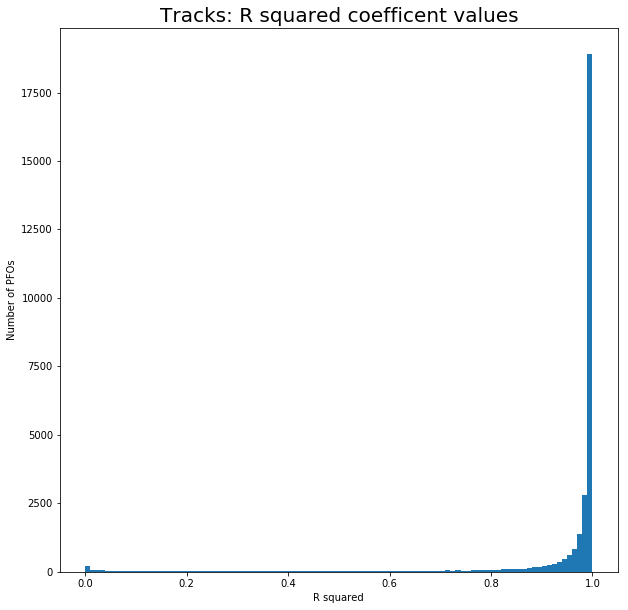

In [27]:
for i in track_pfos:
    fig = plt.figure(1, figsize=(10, 10))
    hist1 = plt.hist(rsq[i], 100)
    plt.title('Tracks: R squared coefficent values', fontsize = 20)
    plt.xlabel('R squared')
    plt.ylabel('Number of PFOs')

    plt.show()

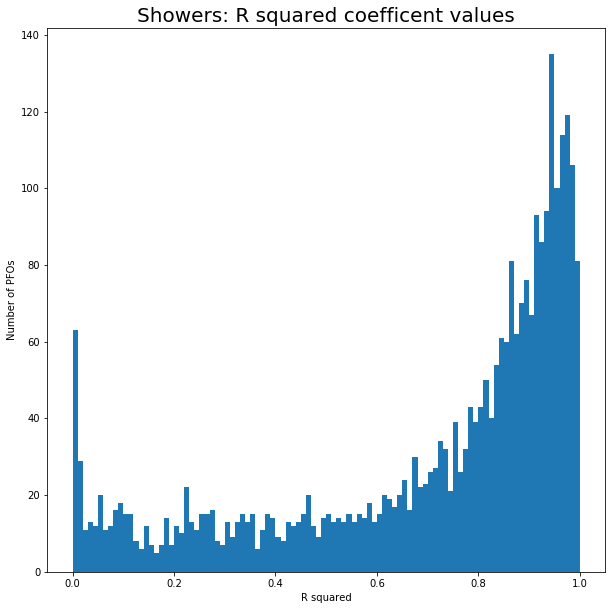

In [28]:
for i in shower_pfos:
    fig = plt.figure(1, figsize=(10, 10))
    hist1 = plt.hist(rsq[i], 100)
    plt.title('Showers: R squared coefficent values', fontsize = 20)
    plt.xlabel('R squared')
    plt.ylabel('Number of PFOs')

    plt.show()

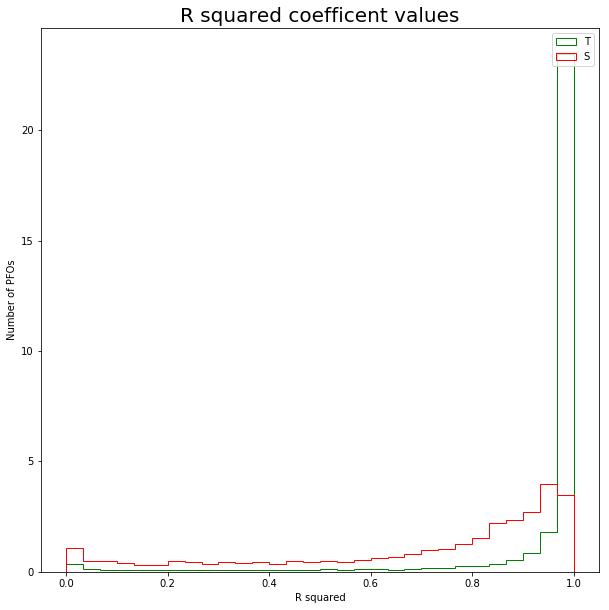

In [29]:
for i in track_pfos:
    for j in shower_pfos:
        fig = plt.figure(1, figsize=(10, 10))
        plt.hist(rsq[i], 30, density = True, color = 'g', histtype=u'step')
        plt.hist(rsq[j], 30, density = True, color = 'r', histtype=u'step')
        plt.title('R squared coefficent values', fontsize = 20)
        plt.xlabel('R squared')
        plt.ylabel('Number of PFOs')

        plt.legend('TS')
        plt.show()

# Calculate RMS

In [64]:
sd_y = np.sqrt(((wirePos - wire_pos_av) ** 2).mean())
rms = np.sqrt(1 - rsq) * sd_y

rmsperhit = []

for i in range(len(wirePos)):
    rms_phit = np.array(rms[i] / len(wirePos[i]))
    
    rmsperhit.append(rms_phit)

rms_per_hit = np.array(rmsperhit)

# Plot RMS

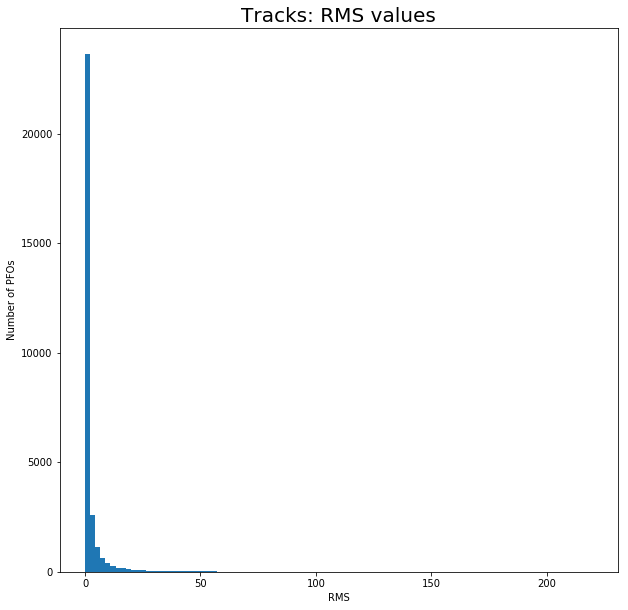

In [25]:
for i in track_pfos:
    fig = plt.figure(1, figsize=(10, 10))
    hist1 = plt.hist(rms[i], 100)
    plt.title('Tracks: RMS values', fontsize = 20)
    plt.xlabel('RMS')
    plt.ylabel('Number of PFOs')

    plt.show()

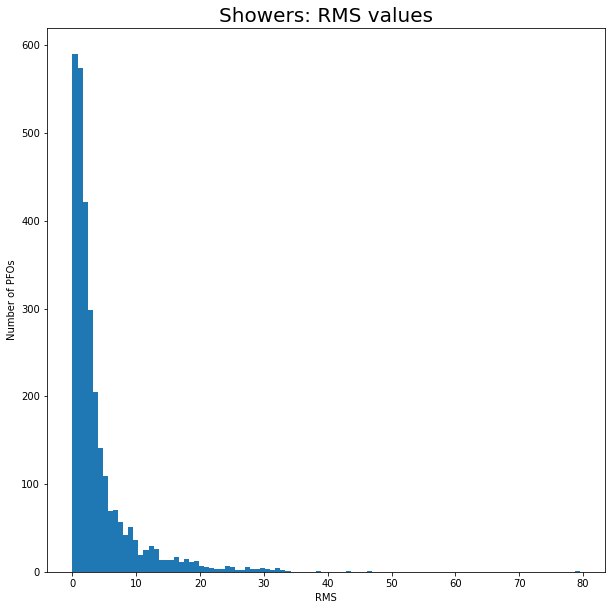

In [26]:
for i in shower_pfos:
    fig = plt.figure(1, figsize=(10, 10))
    hist1 = plt.hist(rms[i], 100)
    plt.title('Showers: RMS values', fontsize = 20)
    plt.xlabel('RMS')
    plt.ylabel('Number of PFOs')

    plt.show()

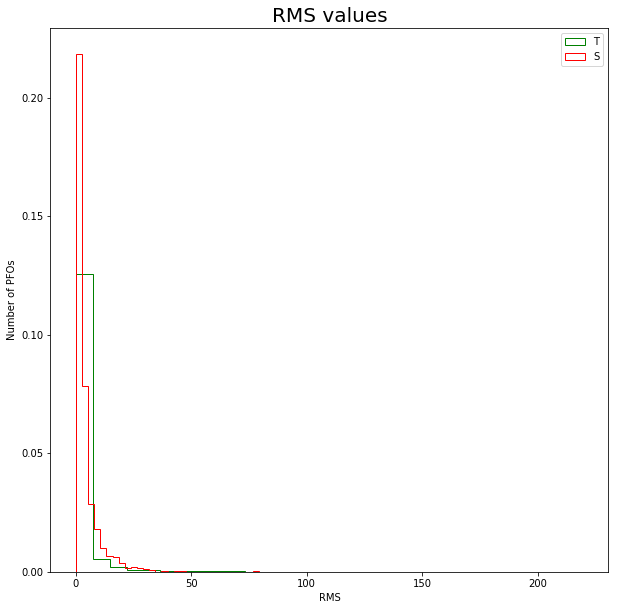

In [27]:
for i in track_pfos:
    for j in shower_pfos:
        fig = plt.figure(1, figsize=(10, 10))
        plt.hist(rms[i], 30, density = True, color = 'g', histtype=u'step')
        plt.hist(rms[j], 30, density = True, color = 'r', histtype=u'step')
        plt.title('RMS values', fontsize = 20)
        plt.xlabel('RMS')
        plt.ylabel('Number of PFOs')

        plt.legend('TS')
        plt.show()

# RMS per hit 

In [28]:
tracks_rms_per_hit = []

showers_rms_per_hit = []

for i in range(len(track_pfos[0])):
    
    tracks_rms_per_hit.append(rms[i] /len(wirePos[i]))
    
for i in range(len(shower_pfos[0])):
    
    showers_rms_per_hit.append(rms[i] /len(wirePos[i]))

# RMS per hit plots

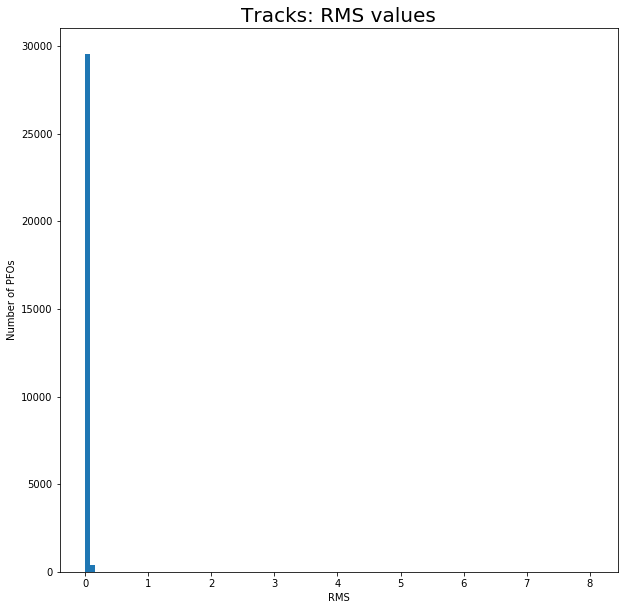

In [73]:
for i in track_pfos:
    fig = plt.figure(1, figsize=(10, 10))
    hist1 = plt.hist(rms_per_hit[i], 100)
    plt.title('Tracks: RMS values', fontsize = 20)
    plt.xlabel('RMS')
    plt.ylabel('Number of PFOs')

    plt.show()

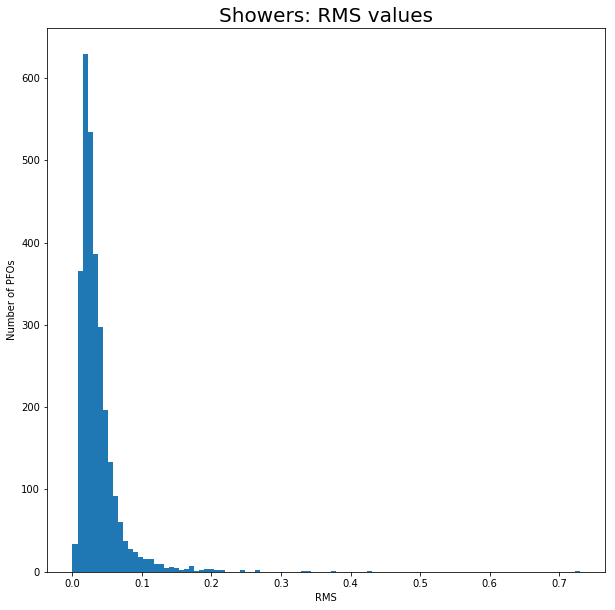

In [74]:
for i in shower_pfos:
    fig = plt.figure(1, figsize=(10, 10))
    hist1 = plt.hist(rms_per_hit[i], 100)
    plt.title('Showers: RMS values', fontsize = 20)
    plt.xlabel('RMS')
    plt.ylabel('Number of PFOs')

    plt.show()

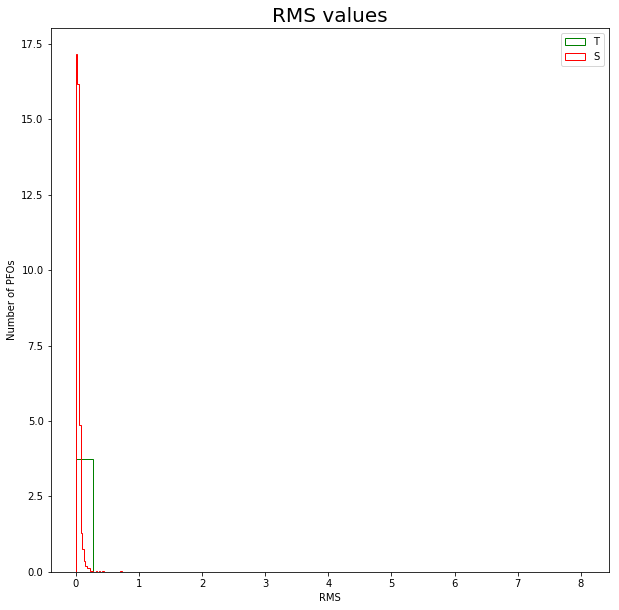

In [75]:
for i in track_pfos:
    
    for j in shower_pfos:

        fig = plt.figure(1, figsize=(10, 10))
        plt.hist(rms_per_hit[i], 30, density = True, color = 'g', histtype=u'step')
        plt.hist(rms_per_hit[j], 30, density = True, color = 'r', histtype=u'step')
        plt.title('RMS values', fontsize = 20)
        plt.xlabel('RMS')
        plt.ylabel('Number of PFOs')

        plt.legend('TS')
        plt.show()